# Классификация Oxford Pets

Обучим сеть для классификации исходного датасета [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Загрузите датасет с Kaggle.

Загрузил через сайт.

Разделение на обучающий и тестовый наборы, аугментация данных, преобразование изображений в тензоры и нормализация.

In [36]:
import os
# from torchvision import datasets, models, transforms
import torch
import numpy as np
from torch.utils.data import DataLoader
import seaborn as sns
import shutil
from sklearn.metrics import confusion_matrix
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Доступные устройства для CUDA:")
    for i in range(torch.cuda.device_count()):
        print(f"Устройство {i}: {torch.cuda.get_device_name(i)}")
        cuda_version = torch.version.cuda
        print("Версия CUDA:", cuda_version)
else:
    print("CUDA недоступен. Используется CPU.")


Доступные устройства для CUDA:
Устройство 0: NVIDIA GeForce RTX 3060 Laptop GPU
Версия CUDA: 11.8


In [6]:
# test_size = 0.8
# 
# dir = os.listdir('images/')
# 
# def get_class(string):
#     for i, ch in enumerate(string):
#         if ch.isdigit():
#             return string[:i-1]
#         
# classes = list(set([get_class(img) for img in dir if get_class(img) is not None]))
# 
# for cl in classes:
#     os.makedirs(os.path.join('images/train/', cl), exist_ok=True)
#     os.makedirs(os.path.join('images/test/', cl), exist_ok=True)
# 
# for i, image in enumerate(dir):
#     cur_class = get_class(image)
#     if cur_class is None:
#         continue
#     if np.random.random(1) < 1 - test_size:
#         shutil.copy(os.path.join('./images', image), os.path.join('./images/train', cur_class))
#     else:
#         shutil.copy(os.path.join('./images', image), os.path.join('./images/test', cur_class))


KeyboardInterrupt: 

In [37]:
from torchvision import datasets, transforms

transform = transforms.Compose([
                                transforms.Resize((64, 64)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

train = datasets.ImageFolder('./images/train', transform=transform)
test = datasets.ImageFolder('./images/test', transform=transform)

train_loader = DataLoader(train, batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=32, shuffle=True)

In [38]:
import os
import shutil
import torch
import torchvision.models as models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = models.vgg16(pretrained=True).to(device)
vgg19 = models.vgg19(pretrained=True).to(device)
resnet50 = models.resnet50(pretrained=True).to(device)

print("Models downloaded successfully.")

a:\python\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
a:\python\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
a:\python\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
a:\python\lib\site-pac

Models downloaded successfully.


Замораживаем параметры всех слоев, кроме последнего

In [39]:
num_classes = 37

In [40]:
print(f"Количество классов в train: {len(train_loader.dataset.classes)} \nКоличество классов в test: {len(test_loader.dataset.classes)}")

Количество классов в train: 37 
Количество классов в test: 37


In [41]:
for param in vgg16.parameters():
    param.requires_grad = False
vgg16.classifier[-1] = torch.nn.Linear(vgg16.classifier[-1].in_features, num_classes)

for param in vgg19.parameters():
    param.requires_grad = False
vgg19.classifier[-1] = torch.nn.Linear(vgg19.classifier[-1].in_features, num_classes)

for param in resnet50.parameters():
    param.requires_grad = False
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, num_classes)

print(vgg16)
print(vgg19)
print(resnet50)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### VGG16

In [37]:
import matplotlib.pyplot as plt
import torch.optim as optim

train_accuracy = []
test_accuracy = []
train_losses = []
test_losses = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = vgg16 
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        inputs = inputs.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)
    
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_losses.append(running_loss / len(test_loader))
    test_accuracy.append(correct_test / total_test)
    
    print('[%d] Train Loss: %.3f, Test Loss: %.3f, Train Accuracy: %.3f, Test Accuracy: %.3f' %
          (epoch + 1, train_losses[-1], test_losses[-1], train_accuracy[-1], test_accuracy[-1]))




[1] Train Loss: 2.791, Test Loss: 1.682, Train Accuracy: 0.331, Test Accuracy: 0.527
[2] Train Loss: 2.043, Test Loss: 1.438, Train Accuracy: 0.478, Test Accuracy: 0.603
[3] Train Loss: 1.787, Test Loss: 1.359, Train Accuracy: 0.529, Test Accuracy: 0.640
[4] Train Loss: 1.543, Test Loss: 1.271, Train Accuracy: 0.591, Test Accuracy: 0.673
[5] Train Loss: 1.547, Test Loss: 1.263, Train Accuracy: 0.585, Test Accuracy: 0.684


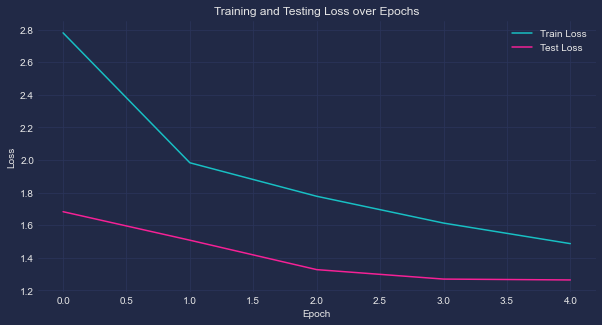

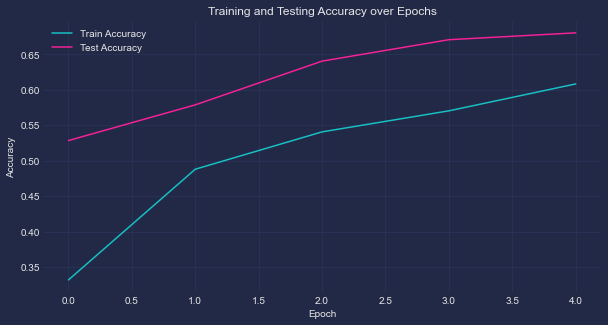

In [12]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

## confusion matrix

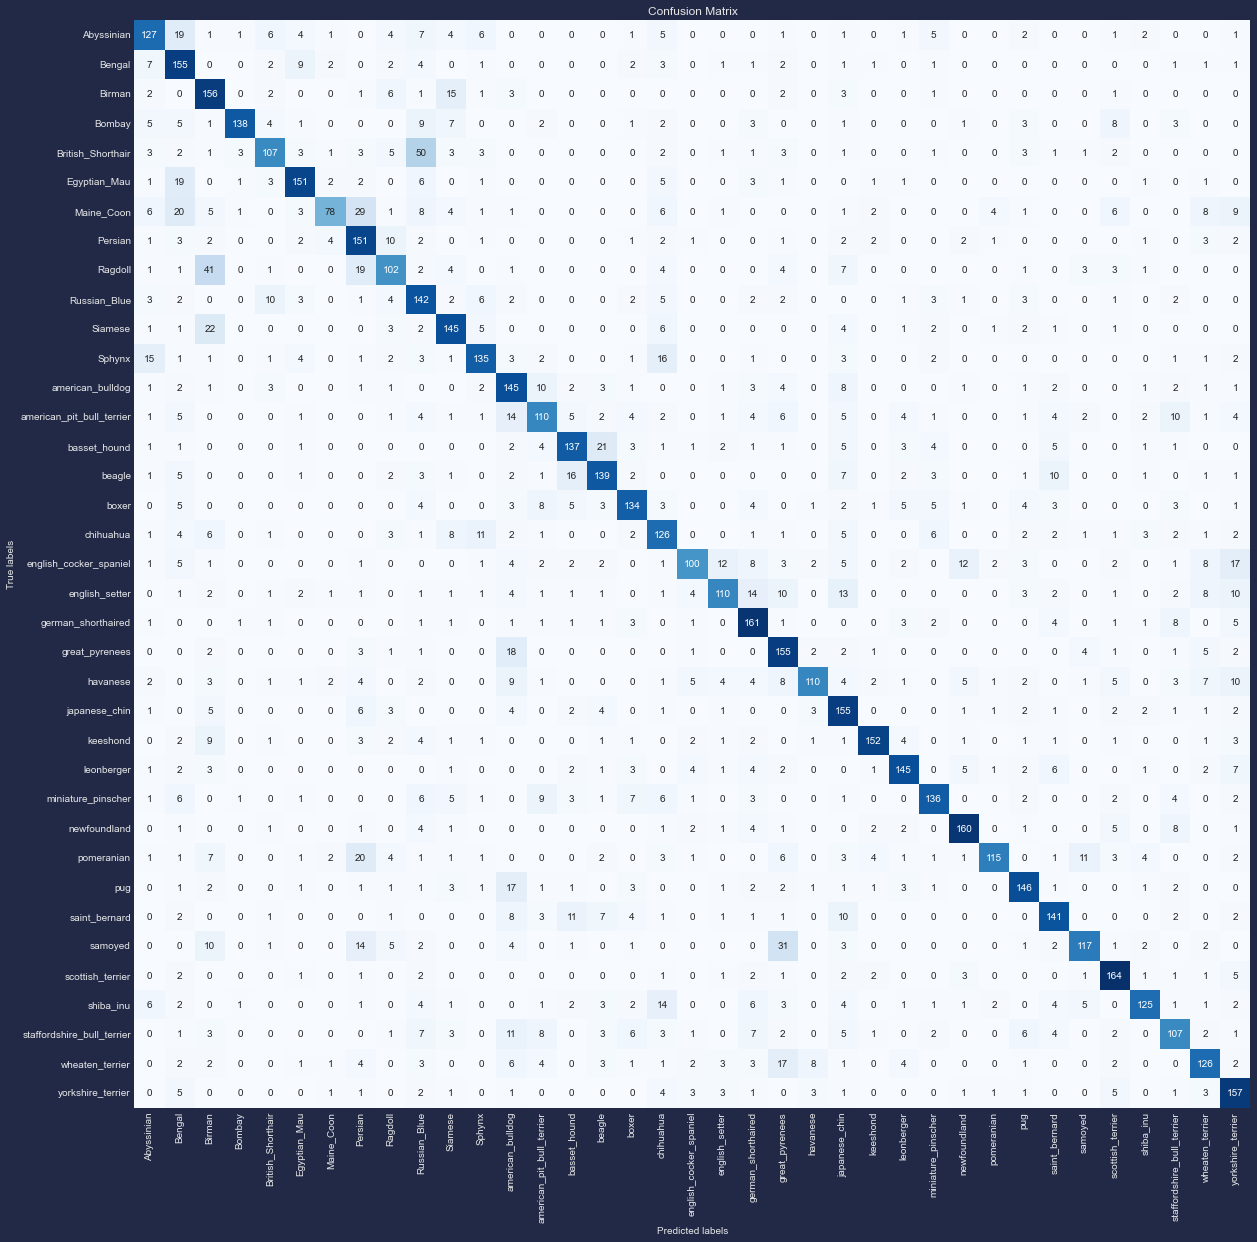

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns



class_names = train.classes

true_labels = []
predicted_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg16.to(device)

vgg16.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### VGG19

In [13]:
import matplotlib.pyplot as plt
import torch.optim as optim

train_accuracy = []
test_accuracy = []
train_losses = []
test_losses = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = vgg19
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        inputs = inputs.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)
    
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_losses.append(running_loss / len(test_loader))
    test_accuracy.append(correct_test / total_test)
    
    print('[%d] Train Loss: %.3f, Test Loss: %.3f, Train Accuracy: %.3f, Test Accuracy: %.3f' %
          (epoch + 1, train_losses[-1], test_losses[-1], train_accuracy[-1], test_accuracy[-1]))




[1] Train Loss: 2.773, Test Loss: 1.604, Train Accuracy: 0.335, Test Accuracy: 0.541
[2] Train Loss: 2.016, Test Loss: 1.486, Train Accuracy: 0.472, Test Accuracy: 0.588
[3] Train Loss: 1.831, Test Loss: 1.377, Train Accuracy: 0.517, Test Accuracy: 0.629
[4] Train Loss: 1.604, Test Loss: 1.282, Train Accuracy: 0.565, Test Accuracy: 0.664
[5] Train Loss: 1.505, Test Loss: 1.307, Train Accuracy: 0.597, Test Accuracy: 0.676


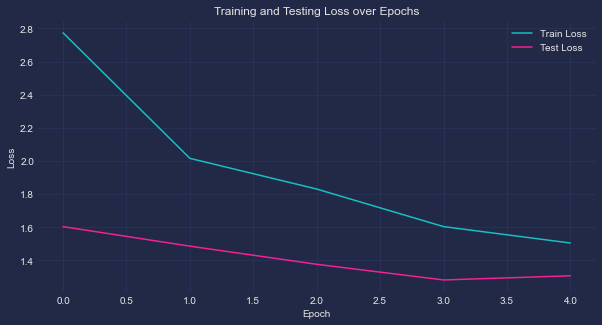

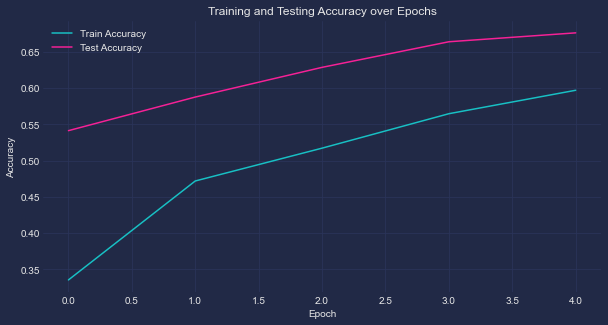

In [14]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

### RESNET50

In [15]:
import matplotlib.pyplot as plt
import torch.optim as optim

train_accuracy = []
test_accuracy = []
train_losses = []
test_losses = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = resnet50
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        inputs = inputs.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)
    
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_losses.append(running_loss / len(test_loader))
    test_accuracy.append(correct_test / total_test)
    
    print('[%d] Train Loss: %.3f, Test Loss: %.3f, Train Accuracy: %.3f, Test Accuracy: %.3f' %
          (epoch + 1, train_losses[-1], test_losses[-1], train_accuracy[-1], test_accuracy[-1]))




[1] Train Loss: 3.186, Test Loss: 2.487, Train Accuracy: 0.162, Test Accuracy: 0.334
[2] Train Loss: 2.444, Test Loss: 2.250, Train Accuracy: 0.345, Test Accuracy: 0.391
[3] Train Loss: 2.218, Test Loss: 2.268, Train Accuracy: 0.383, Test Accuracy: 0.408
[4] Train Loss: 2.110, Test Loss: 2.093, Train Accuracy: 0.418, Test Accuracy: 0.452
[5] Train Loss: 2.004, Test Loss: 2.109, Train Accuracy: 0.439, Test Accuracy: 0.443


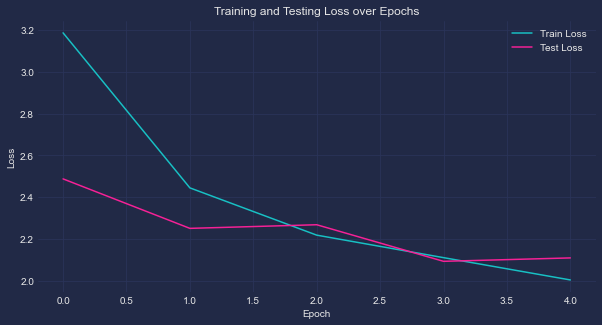

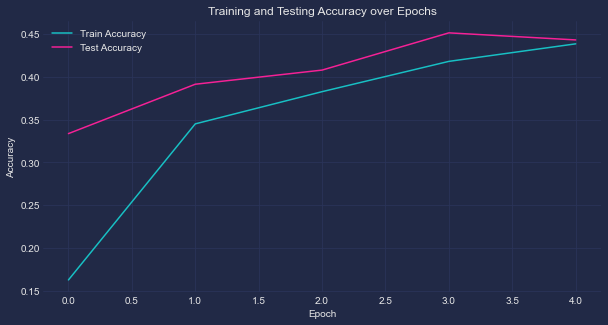

In [16]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

Самый лучший результат показал VGG16 (Test Accuracy: 0.680)

Посчитаем top-3 и top-5 accuracy для VGG16

In [18]:
import matplotlib.pyplot as plt
import torch.optim as optim

train_accuracy = []
test_accuracy = []
train_losses = []
test_losses = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = vgg16 
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)
test_top3_accuracy = []
test_top5_accuracy = []
train_top3_accuracy = [] 
train_top5_accuracy = [] 

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    top3_correct_train = 0 
    top5_correct_train = 0 
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        inputs = inputs.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        _, predicted_top3 = torch.topk(outputs, k=3, dim=1)
        for i in range(labels.size(0)):
            if labels[i] in predicted_top3[i]:
                top3_correct_train += 1

        _, predicted_top5 = torch.topk(outputs, k=5, dim=1)
        for i in range(labels.size(0)):
            if labels[i] in predicted_top3[i]:
                top5_correct_train += 1

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)
    train_top3_accuracy.append(top3_correct_train / total_train)  
    train_top5_accuracy.append(top5_correct_train / total_train)  
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    top3_correct_test = 0
    top5_correct_test = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

            _, predicted = torch.topk(outputs, k=3, dim=1)
            
            for i in range(labels.size(0)):
                if labels[i] in predicted[i]:
                    top3_correct_test += 1

            _, predicted = torch.topk(outputs, k=5, dim=1)
            
            for i in range(labels.size(0)):
                if labels[i] in predicted[i]:
                    top5_correct_test += 1
    
    test_losses.append(running_loss / len(test_loader))
    test_accuracy.append(correct_test / total_test)
    test_top3_accuracy.append(top3_correct_test / total_test)
    test_top5_accuracy.append(top5_correct_test / total_test)
    print('[%d] Train Loss: %.3f, Test Loss: %.3f, Train Accuracy: %.3f, Train Top 3 Accuracy: %.3f, Train Top 5 Accuracy: %.3f, Test Accuracy: %.3f, Test Top 3 Accuracy: %.3f, Test Top 5 Accuracy: %.3f' %
          (epoch + 1, train_losses[-1], test_losses[-1], train_accuracy[-1], train_top3_accuracy[-1], train_top5_accuracy[-1], test_accuracy[-1], test_top3_accuracy[-1], test_top5_accuracy[-1]))




[1] Train Loss: 1.552, Test Loss: 1.387, Train Accuracy: 0.637, Train Top 3 Accuracy: 0.881, Train Top 5 Accuracy: 0.881, Test Accuracy: 0.698, Test Top 3 Accuracy: 0.867, Test Top 5 Accuracy: 0.919
[2] Train Loss: 1.416, Test Loss: 1.408, Train Accuracy: 0.660, Train Top 3 Accuracy: 0.893, Train Top 5 Accuracy: 0.893, Test Accuracy: 0.706, Test Top 3 Accuracy: 0.869, Test Top 5 Accuracy: 0.915
[3] Train Loss: 1.321, Test Loss: 1.297, Train Accuracy: 0.681, Train Top 3 Accuracy: 0.900, Train Top 5 Accuracy: 0.900, Test Accuracy: 0.732, Test Top 3 Accuracy: 0.882, Test Top 5 Accuracy: 0.921
[4] Train Loss: 1.277, Test Loss: 1.319, Train Accuracy: 0.686, Train Top 3 Accuracy: 0.912, Train Top 5 Accuracy: 0.912, Test Accuracy: 0.734, Test Top 3 Accuracy: 0.881, Test Top 5 Accuracy: 0.922
[5] Train Loss: 1.240, Test Loss: 1.370, Train Accuracy: 0.688, Train Top 3 Accuracy: 0.917, Train Top 5 Accuracy: 0.917, Test Accuracy: 0.734, Test Top 3 Accuracy: 0.877, Test Top 5 Accuracy: 0.920


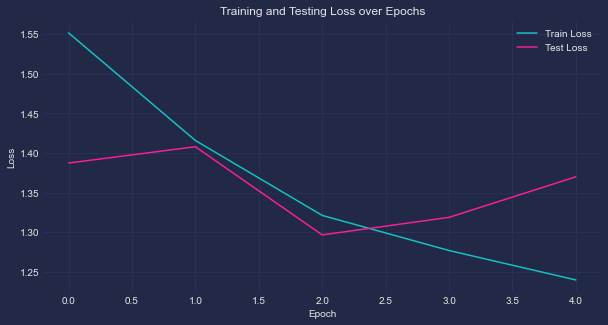

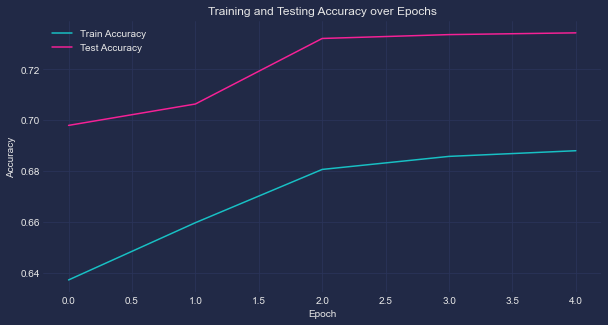

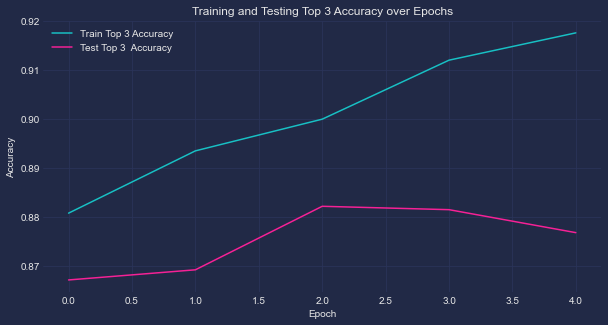

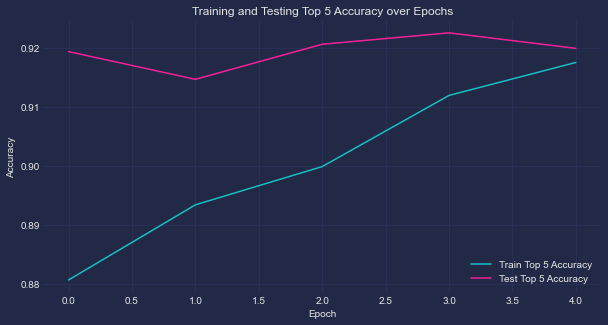

In [22]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_top3_accuracy, label='Train Top 3 Accuracy')
plt.plot(test_top3_accuracy, label='Test Top 3  Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Top 3 Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_top5_accuracy, label='Train Top 5 Accuracy')
plt.plot(test_top5_accuracy, label='Test Top 5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Top 5 Accuracy over Epochs')
plt.legend()
plt.show()

91% (top 5) на тесте

### Бинарная классификация

In [23]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split


data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),           
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) 
])

data_dir = "new_petfaces"

image_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

train_indices, test_indices = train_test_split(list(range(len(image_dataset))), test_size=0.2, stratify=image_dataset.targets, random_state=42)

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

batch_size = 32
train_loader = DataLoader(image_dataset, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(image_dataset, batch_size=batch_size, sampler=test_sampler)

In [24]:
print(f"Количество классов в train: {len(train_loader.dataset.classes)} \nКоличество классов в test: {len(test_loader.dataset.classes)}")

Количество классов в train: 2 
Количество классов в test: 2


In [25]:
vgg16 = models.vgg16(pretrained=True).to(device)

for param in vgg16.parameters():
    param.requires_grad = False
vgg16.classifier[-1] = torch.nn.Linear(vgg16.classifier[-1].in_features, 2)

a:\python\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
a:\python\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
import matplotlib.pyplot as plt
import torch.optim as optim

train_accuracy = []
test_accuracy = []
train_losses = []
test_losses = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = resnet50
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        inputs = inputs.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(correct_train / total_train)
    
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_losses.append(running_loss / len(test_loader))
    test_accuracy.append(correct_test / total_test)
    
    print('[%d] Train Loss: %.3f, Test Loss: %.3f, Train Accuracy: %.3f, Test Accuracy: %.3f' %
          (epoch + 1, train_losses[-1], test_losses[-1], train_accuracy[-1], test_accuracy[-1]))




[1] Train Loss: 0.470, Test Loss: 0.148, Train Accuracy: 0.819, Test Accuracy: 0.935
[2] Train Loss: 0.146, Test Loss: 0.075, Train Accuracy: 0.945, Test Accuracy: 0.974
[3] Train Loss: 0.095, Test Loss: 0.070, Train Accuracy: 0.962, Test Accuracy: 0.977
[4] Train Loss: 0.098, Test Loss: 0.052, Train Accuracy: 0.961, Test Accuracy: 0.983
[5] Train Loss: 0.073, Test Loss: 0.063, Train Accuracy: 0.971, Test Accuracy: 0.980


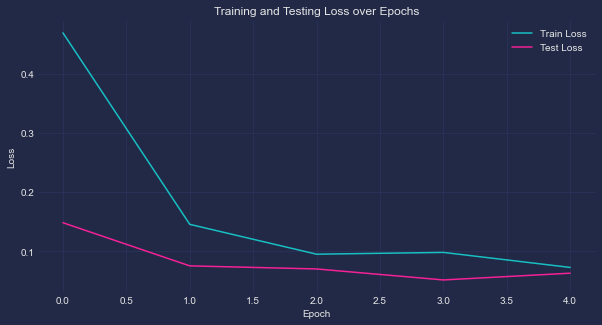

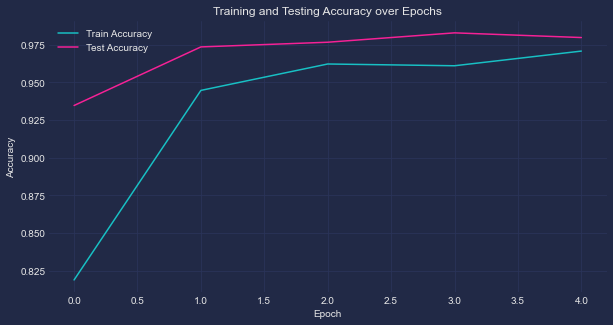

In [28]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

Видно, что точность на тесте 98% 

Выполнить визуализацию зон интереса, на которые "смотрит" нейросеть при определении тех или иных классов, с помощью алгоритма GradCam. Выберите 5 изображений и соответственно 5 классов, и постройте матрицу 5x5 изображений с картами активации.


Для визуализации изображений используйте функцию:

In [39]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

C:\Users\ilya\AppData\Local\Temp\ipykernel_8952\2310290505.py:4: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(Image.open('./images/train/Abyssinian/Abyssinian_180.jpg').resize((300,224),Image.LANCZOS))[:,20:224+20]


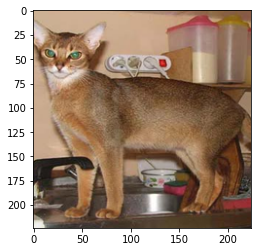

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img = np.array(Image.open('./images/train/Abyssinian/Abyssinian_180.jpg').resize((300,224),Image.LANCZOS))[:,20:224+20]
plt.imshow(img)


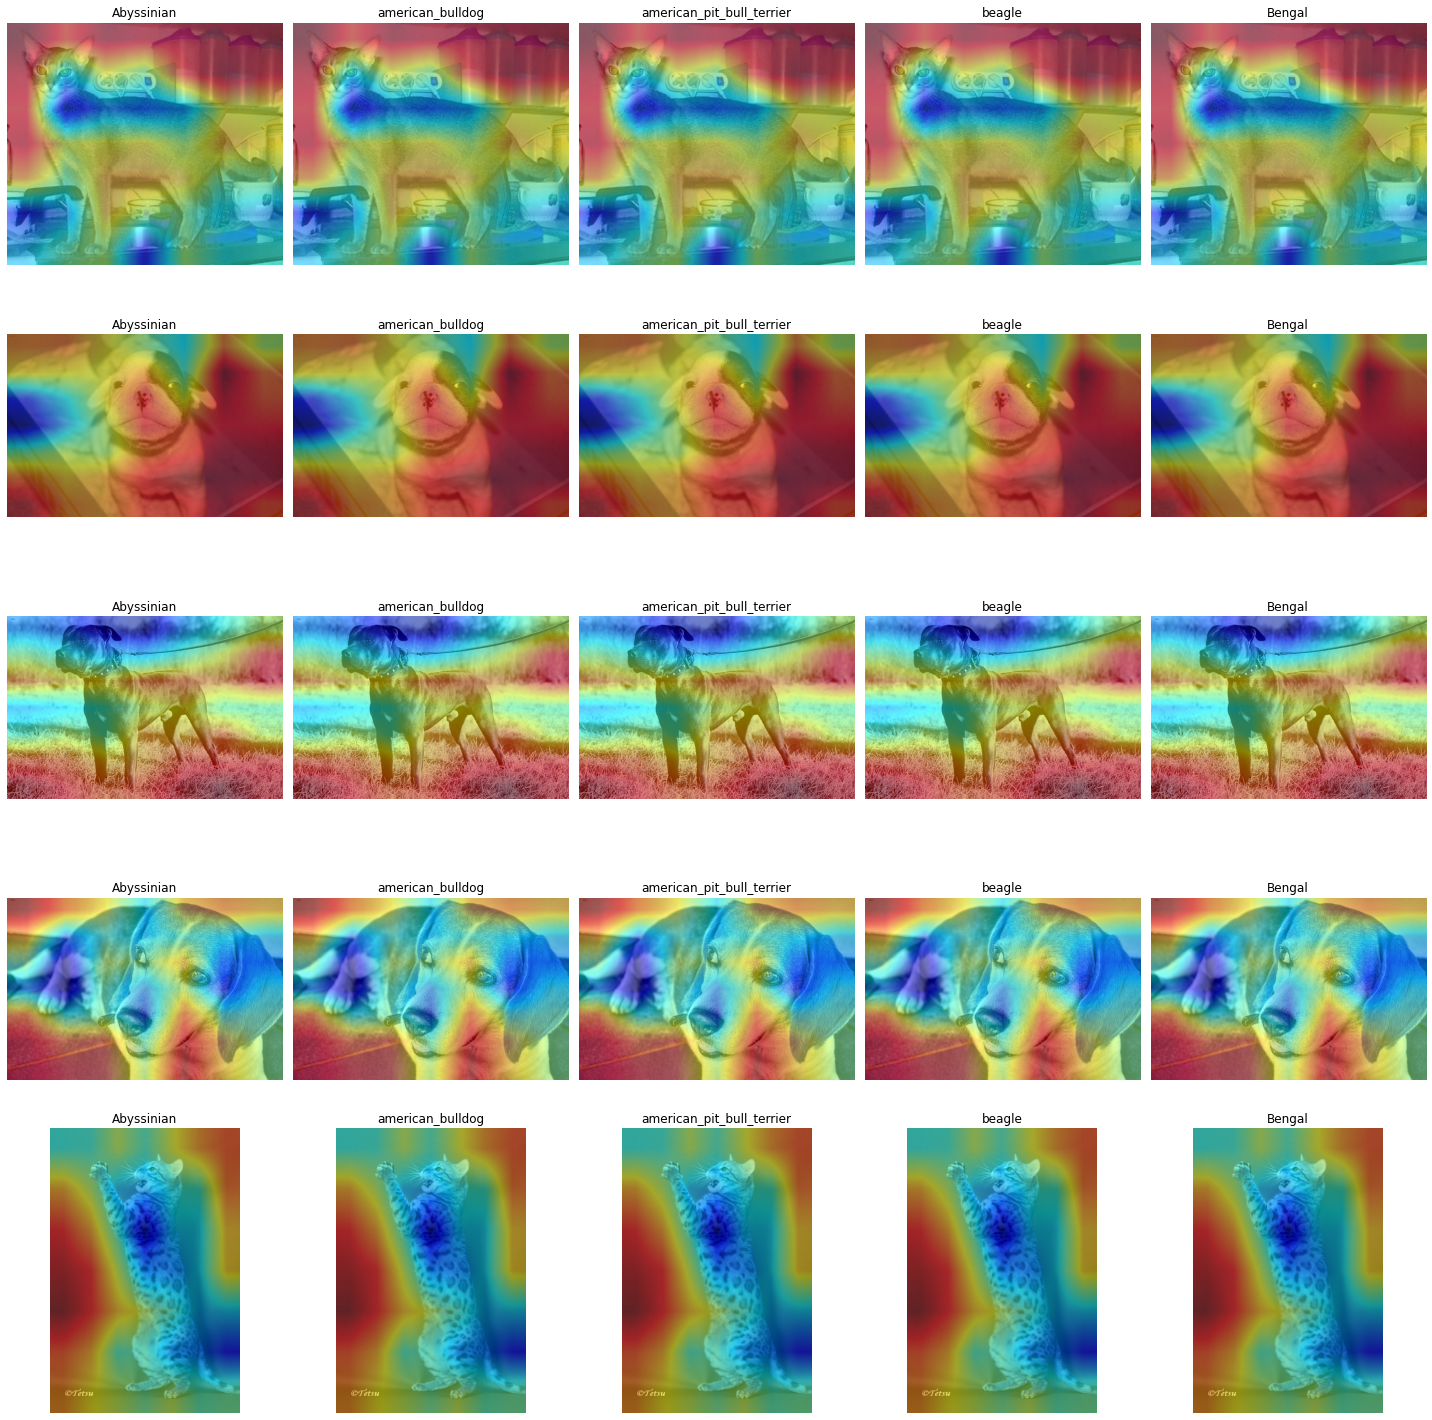

In [82]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class_names = [
    'Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'beagle', 'Bengal'
]


image_paths = [
    './images/train/Abyssinian/Abyssinian_180.jpg',
    './images/train/american_bulldog/american_bulldog_2.jpg',
    './images/train/american_pit_bull_terrier/american_pit_bull_terrier_4.jpg',
    './images/train/beagle/beagle_2.jpg',
    './images/train/Bengal/Bengal_1.jpg'
]

fig, axs = plt.subplots(len(image_paths), len(class_names), figsize=(20, 20))

for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)
    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0).to(device)

    

    for j, class_name in enumerate(class_names):
        class_index = j

        one_hot = torch.zeros(1, output.size()[-1], dtype=torch.float32).to(device)

        one_hot[0, class_index] = 1 
        one_hot.requires_grad = True

        model.zero_grad()
        output.backward(gradient=one_hot[0], retain_graph=True)
        features_blobs = []
        def hook_feature(module, input, output):
            features_blobs.append(output.data.cpu().numpy())

        model.layer4.register_forward_hook(hook_feature)

        output = model(image_tensor)
        output = output[0]
        gradients = features_blobs[-1][0]
        weights = np.mean(gradients, axis=(1, 2))
        grad_cam = np.sum(weights[:, None, None] * features_blobs[-1][0], axis=0)
        grad_cam = cv2.resize(grad_cam, image.size)
        grad_cam = (grad_cam - grad_cam.min()) / (grad_cam.max() - grad_cam.min()) 

        heatmap = cv2.applyColorMap(np.uint8(255 * grad_cam), cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR), 0.5, heatmap, 0.5, 0)

        axs[i, j].imshow(superimposed_img)
        axs[i, j].set_title(class_name)
        axs[i, j].axis('off')


plt.tight_layout()
plt.show()

Видим, что модель смотрит практически одинаково на один и тот же класс.